In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from scipy.spatial import distance
import matplotlib.cm as cm
import scipy
from sklearn.decomposition import PCA
from functools import reduce
import matplotlib.cbook
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
%matplotlib 
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering

Using matplotlib backend: Qt5Agg


In [2]:
df = pd.read_excel('DatasetSIOTFinal_fix.xls',index_col=0)
df.head()

,Country,Year,c1_in_p,c2_in_p,c3_in_p,c4_in_p,c5_in_p,c6_in_p,c7_in_p,c8_in_p,...,c45_C_val,c46_C_val,c47_C_val,c48_C_val,c49_C_val,c50_C_val,c51_C_val,c52_C_val,c53_C_val,c54_C_val
0,AUS,2000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.617284,0.617284,0.617284,0.617284,0.617284,0.617284,0.617284,0.617284,0.617284,3.703704
1,AUT,2000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.617284,0.617284,0.000000,0.000000,0.000000,0.617284,0.617284,0.617284,0.617284,0.617284
2,BEL,2000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.234568,0.617284,0.000000,0.000000,0.000000,0.617284,1.851852,1.851852,0.617284,1.234568
3,BGR,2000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.000000,0.000000,0.617284,0.000000,0.000000,1.851852,0.617284,0.617284,1.851852,0.617284
4,BRA,2000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.617284,0.617284,0.000000,0.617284,0.617284,0.617284,0.617284,0.617284,0.617284,5.555556


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 662 entries, 0 to 661
Columns: 164 entries, Country to c54_C_val
dtypes: float64(162), int64(1), object(1)
memory usage: 853.4+ KB


In [4]:
df.describe()

,Year,c1_in_p,c2_in_p,c3_in_p,c4_in_p,c5_in_p,c6_in_p,c7_in_p,c8_in_p,c9_in_p,...,c45_C_val,c46_C_val,c47_C_val,c48_C_val,c49_C_val,c50_C_val,c51_C_val,c52_C_val,c53_C_val,c54_C_val
count,662.000000,6.620000e+02,6.620000e+02,6.620000e+02,6.620000e+02,6.620000e+02,6.620000e+02,6.620000e+02,662.000000,662.000000,...,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000
mean,2007.016616,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.999999,...,0.554810,0.515647,0.441983,0.154787,0.252695,1.537615,3.658946,0.912872,0.785126,2.102682
std,4.329964,1.199559e-07,2.610815e-09,1.459413e-09,5.532725e-08,3.571644e-07,4.049396e-07,2.129950e-08,0.000001,0.000021,...,0.454421,0.302799,0.284703,0.267763,0.303758,4.652496,6.133328,0.739714,0.646503,2.252513
min,2000.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.999999e-01,9.999997e-01,1.000000e+00,0.999974,0.999500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.617284
25%,2003.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,...,0.617284,0.617284,0.000000,0.000000,0.000000,0.617284,0.617284,0.617284,0.617284,0.617284
50%,2007.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,...,0.617284,0.617284,0.617284,0.000000,0.000000,0.617284,1.234568,0.617284,0.617284,1.234568
75%,2011.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,...,0.617284,0.617284,0.617284,0.462963,0.617284,0.617284,3.703704,0.617284,0.617284,2.469136
max,2015.000000,1.000002e+00,1.000000e+00,1.000000e+00,1.000001e+00,1.000007e+00,1.000008e+00,1.000000e+00,1.000001,1.000002,...,3.703704,1.851852,1.234568,0.617284,0.617284,31.481481,33.333333,8.024691,8.024691,12.962963


In [5]:
# Analysis will be done on year 2010
df_2010 = df[df['Year']==2010]
print('Dataset shape: ',df_2010.shape)
df_2010.head()
num_countries = len(np.unique(df_2010['Country']))

Dataset shape:  (45, 164)


In [6]:
# I'll take a couple of representative countries and compare the distributions of the p-values
high_gdp_repr = ['USA','CHN','JPN','DEU','IND']
medium_gdp_repr = ['FRA','CAN','RUS','ESP','TUR']
low_gdp_repr = ['MK','ROW','CYP','EST','LTU']

#### Separate analysis 

In [7]:
def geo_mean(v):
    a = np.array(v)
    return a.prod()**(1.0/len(a))

def print_stat(v,verbose=True):
    stat_dict={}
    stat_dict['Product']=np.prod(v)
    stat_dict['Geo_mean']=geo_mean(v)
    stat_dict['Mean']=np.mean(v)
    stat_dict['Median']=np.median(v)
    stat_dict['Max']=np.max(v)
    stat_dict['Sector_max']=np.argmax(v)
    stat_dict['Min']=np.min(v)
    stat_dict['Sector_min']=np.argmin(v)
    stat_dict['Std']=np.std(v)
    if verbose:
        print("Product: ",stat_dict['Product'])
        print("Geometric mean: ",stat_dict['Geo_mean'])
        print("Mean: ",np.mean(v))
        print("Median: ",np.median(v))
        print("Max: ",np.max(v)," for sector ",np.argmax(v)+1)
        print("Min: ",np.min(v)," for sector ",np.argmin(v)+1)
        print("Std: ",np.std(v))
    return stat_dict

In [8]:
def basic_information_p_vector(country_set):
    cols_in=['c'+str(idx)+'_in_p' for idx in range(1,55)]
    cols_out=['c'+str(idx)+'_out_p' for idx in range(1,55)]
    df_in = df_2010[df_2010['Country'].isin(country_set)].loc[:,['Country']+cols_in]
    df_out = df_2010[df_2010['Country'].isin(country_set)].loc[:,['Country']+cols_out]
    
    max_product=0
    min_std=2
    
    for country in country_set:
        vals_in = df_in[df_in['Country']==country].iloc[0,1:].values
        vals_out = df_out[df_out['Country']==country].iloc[0,1:].values
        values_series_in = pd.Series(vals_in)
        values_series_out = pd.Series(vals_out)
        stats_in = print_stat(values_series_in,verbose=False)
        stats_out = print_stat(values_series_out,verbose=False)
        
        if stats_in['Product']>stats_out['Product']:
            if stats_in['Product']>max_product:
                max_product=stats_in['Product']
                min_std=stats_in['Std']
        else:
            if stats_out['Product']>max_product:
                max_product=stats_out['Product']
                min_std=stats_out['Std']
    
    
    for country in country_set:
        vals_in = df_in[df_in['Country']==country].iloc[0,1:].values
        plt.figure(figsize=(15,10))
        plt.subplot(1,2,1)
        plt.title('Distribution of p-values for input and output sectors for country '+country)
        graph = sns.distplot(vals_in, color='green', bins=54, hist_kws={'alpha': 0.4},label='Input')
        values_series_in = pd.Series(vals_in)
        print("Printing statistics for p-values for input sectors for country ",country)
        stats_in = print_stat(values_series_in)
        graph.set_xlim([1-min_std,max_product+min_std])
        plt.xlabel('P-value')
        plt.ylabel('Frequency')
        graph.set_ylim([0,1e8])
        graph.axvline(stats_in['Product'],label='Product',color='black')
        graph.axvline(stats_in['Geo_mean'],label='Geometric mean',c='orange')
        graph = sns.distplot(vals_out, color='red', bins=54, hist_kws={'alpha': 0.4},label='Output')
        vals_out = df_out[df_out['Country']==country].iloc[0,1:].values
        values_series_out = pd.Series(vals_out)
        print("Printing statistics for p-values for output sectors for country ",country)
        stats_out = print_stat(values_series_out)
        graph.legend()
        plt.subplot(1,2,2)
        plt.title("Per sector(input and output) p-values for country "+country)
        df_sectors = pd.DataFrame()
        df_sectors['Sector'] = list(range(1,55))
        df_sectors['P_value'] = values_series_in.values
        graph2=sns.barplot(x='Sector',y='P_value',data=df_sectors,color='green',label='Input')
        plt.xticks(rotation='vertical')
        graph2.set_ylim([1-min_std,max_product+min_std])
        graph2.axhline(stats_in['Product'],label='Product',color='black')
        graph2.axhline(stats_in['Geo_mean'],label='Geometric mean',c='orange')
        df_sectors = pd.DataFrame()
        df_sectors['Sector'] = list(range(1,55))
        df_sectors['P_value'] = values_series_out.values
        graph2=sns.barplot(x='Sector',y='P_value',data=df_sectors,color='red',label='Output')
        graph2.legend()
        plt.show()

#### Basic P analysis 

In [65]:
# Basic analysis for high gdp countries
basic_information_p_vector(high_gdp_repr)

Printing statistics for p-values for input sectors for country  USA
Product:  1.0000001063141237
Geometric mean:  1.00000000196878
Mean:  1.00000000196878
Median:  1.0000000010045031
Max:  1.0000000131349707  for sector  45
Min:  1.00000000002696  for sector  25
Std:  2.8197462809557665e-09
Printing statistics for p-values for output sectors for country  USA
Product:  1.0000001063141237
Geometric mean:  1.00000000196878
Mean:  1.0000000019687798
Median:  1.0000000008285106
Max:  1.000000016148939  for sector  51
Min:  0.9999999998481043  for sector  26
Std:  3.049098434892267e-09
Printing statistics for p-values for input sectors for country  CHN
Product:  1.0000006457721369
Geometric mean:  1.0000000119587396
Mean:  1.0000000119587396
Median:  1.0000000035649315
Max:  1.0000001257496702  for sector  15
Min:  1.0000000000019673  for sector  23
Std:  2.0092716233240748e-08
Printing statistics for p-values for output sectors for country  CHN
Product:  1.0000006457721358
Geometric mean:  

In [51]:
# Basic analysis for medium gdp countries
basic_information_p_vector(medium_gdp_repr)

Printing statistics for p-values for input sectors for country  FRA
Product:  1.000000299576198
Geometric mean:  1.0000000055477065
Mean:  1.0000000055477065
Median:  1.0000000011695558
Max:  1.000000063091097  for sector  50
Min:  1.0000000000715028  for sector  3
Std:  1.1762453343850365e-08
Printing statistics for p-values for output sectors for country  FRA
Product:  1.000000299576202
Geometric mean:  1.0000000055477067
Mean:  1.0000000055477067
Median:  1.000000002993202
Max:  1.0000000382931302  for sector  27
Min:  1.0  for sector  43
Std:  7.174127124987904e-09
Printing statistics for p-values for input sectors for country  CAN
Product:  1.0000001572254507
Geometric mean:  1.000000002911582
Mean:  1.0000000029115819
Median:  1.0000000012263506
Max:  1.000000015105256  for sector  31
Min:  1.000000000001145  for sector  23
Std:  4.002822325893261e-09
Printing statistics for p-values for output sectors for country  CAN
Product:  1.0000001572254513
Geometric mean:  1.0000000029115

In [31]:
#USA 
print((1+19687800*1e-16)==1.000000001968780)
#print((1+8285106*1e-16)==1.00000000196878)

#RUS
print((1+41435468*1e-16)==1.0000000041435468)
print((1+10382477*1e-16)==1.0000000010382477)

#EST
print((1+126609085*1e-16)==1.0000000126609085)
print((1+55955018*1e-16)==1.0000000055955018)

#MK
print((1+81950370*1e-16)==1.0000000081950370)
print((1+14025740*1e-16)==1.0000000014025740)


print(1.0000000055955018/1.0000000008285106)

True
True
True
True
True
True
True
True
1.0000000047669912


In [52]:
# Basic analysis for low gdp countries
basic_information_p_vector(low_gdp_repr)

Printing statistics for p-values for input sectors for country  MK
Product:  1.0000004425319728
Geometric mean:  1.0000000081950347
Mean:  1.0000000081950349
Median:  1.0000000010444925
Max:  1.000000083719795  for sector  24
Min:  1.0000000000013123  for sector  30
Std:  1.6145059973774228e-08
Printing statistics for p-values for output sectors for country  MK
Product:  1.0000004425319717
Geometric mean:  1.0000000081950347
Mean:  1.0000000081950349
Median:  1.000000001402574
Max:  1.000000080775535  for sector  27
Min:  1.0  for sector  7
Std:  1.6305997112996557e-08
Printing statistics for p-values for input sectors for country  ROW
Product:  1.000000534901552
Geometric mean:  1.0000000099055817
Mean:  1.0000000099055821
Median:  1.0000000019010402
Max:  1.0000001524794595  for sector  24
Min:  1.0000000000014366  for sector  37
Std:  2.475590771504168e-08
Printing statistics for p-values for output sectors for country  ROW
Product:  1.000000534901558
Geometric mean:  1.000000009905

In [79]:
basic_information_p_vector(representatives)

Printing statistics for p-values for input sectors for country  USA
Product:  1.0000001063141237
Geometric mean:  1.00000000196878
Mean:  1.00000000196878
Median:  1.0000000010045031
Max:  1.0000000131349707  for sector  45
Min:  1.00000000002696  for sector  25
Std:  2.8197462809557665e-09
Printing statistics for p-values for output sectors for country  USA
Product:  1.0000001063141237
Geometric mean:  1.00000000196878
Mean:  1.0000000019687798
Median:  1.0000000008285106
Max:  1.000000016148939  for sector  51
Min:  0.9999999998481043  for sector  26
Std:  3.049098434892267e-09
Printing statistics for p-values for input sectors for country  CHN
Product:  1.0000006457721369
Geometric mean:  1.0000000119587396
Mean:  1.0000000119587396
Median:  1.0000000035649315
Max:  1.0000001257496702  for sector  15
Min:  1.0000000000019673  for sector  23
Std:  2.0092716233240748e-08
Printing statistics for p-values for output sectors for country  CHN
Product:  1.0000006457721358
Geometric mean:  

In [20]:
# Comparing p-values for input/output sectors for MK compared to representatives from each group('USA','CHN','RUS',
#'FRA','ROW','EST'). Mean values from USA, RUS and EST are plotted alongside.

In [9]:
# Input sectors

countries = ['USA','CHN','RUS','FRA','ROW','EST','MK']
representatives=['USA','CHN','FRA','RUS','MK','EST']
colors = ['black','yellow','red','blue','brown','gray','orange']

def merge_analysis_p(inp=True):
    if inp:
        cols=['c'+str(idx)+'_in_p' for idx in range(1,55)]
    else:
        cols=['c'+str(idx)+'_out_p' for idx in range(1,55)]

    df = df_2010[df_2010['Country'].isin(countries)].loc[:,['Country']+cols]

    plt.figure(figsize=(20,10))
    for color,country in zip(colors,countries):
        vals = df[df['Country']==country].iloc[0,1:].values
        values_series = pd.Series(vals)
        stats = print_stat(values_series,verbose=False)
        df_sectors = pd.DataFrame()
        df_sectors['Sector'] = list(range(1,55))
        df_sectors['Country']=country
        if inp:
            name = 'P_value_'+'in'
        else:
            name = 'P_value_'+'out'
        plt.subplot(1,2,1)  
        df_sectors[name] = values_series.values
        graph=sns.barplot(x='Sector',y=name,data=df_sectors,color=color,label=country)
        plt.xticks(rotation='vertical')
        graph.set_ylim([1-1e-9,1+1e-8])
        if country in representatives:
            graph.axhline(stats['Median'],label='Median for '+country,color=color,linewidth=4,ls=':')
        graph.legend()
        plt.subplot(1,2,2)
        graph=sns.distplot(vals,color=color,label=country)
        if country in representatives:
            graph.axvline(stats['Median'],label='Median for '+country,color=color,linewidth=4,ls=':')
        graph.set_ylim([0,1e8])
        graph.set_xlim([1-0.25e-7,1+0.6e-7])
        plt.title('Histogram of p-values')
        graph.legend()
    plt.show()

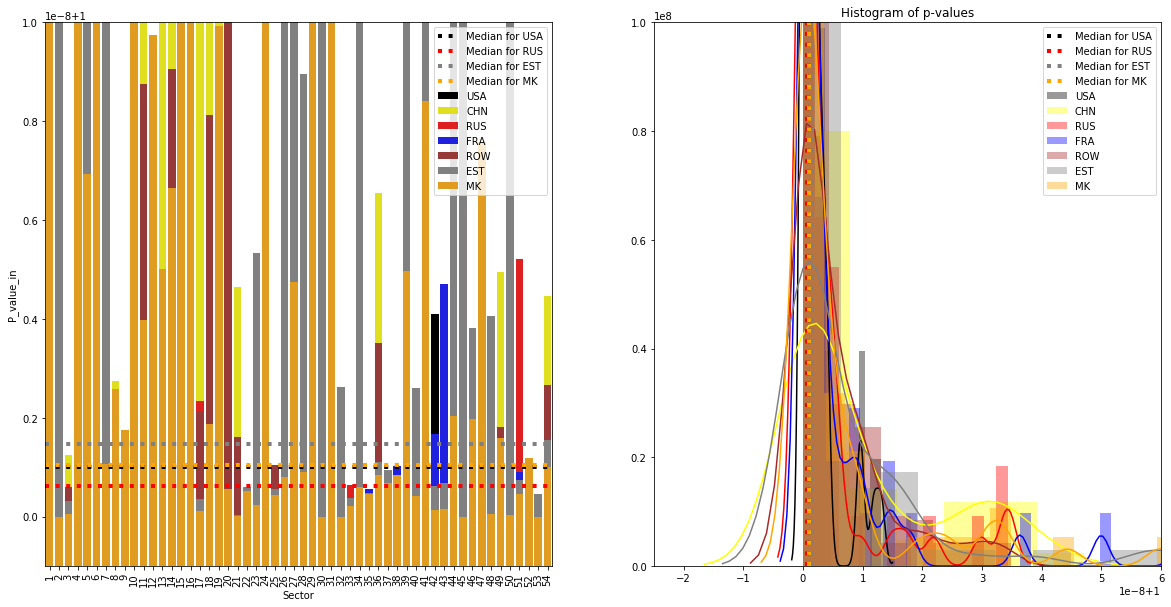

In [22]:
# Input analysis
merge_analysis_p()

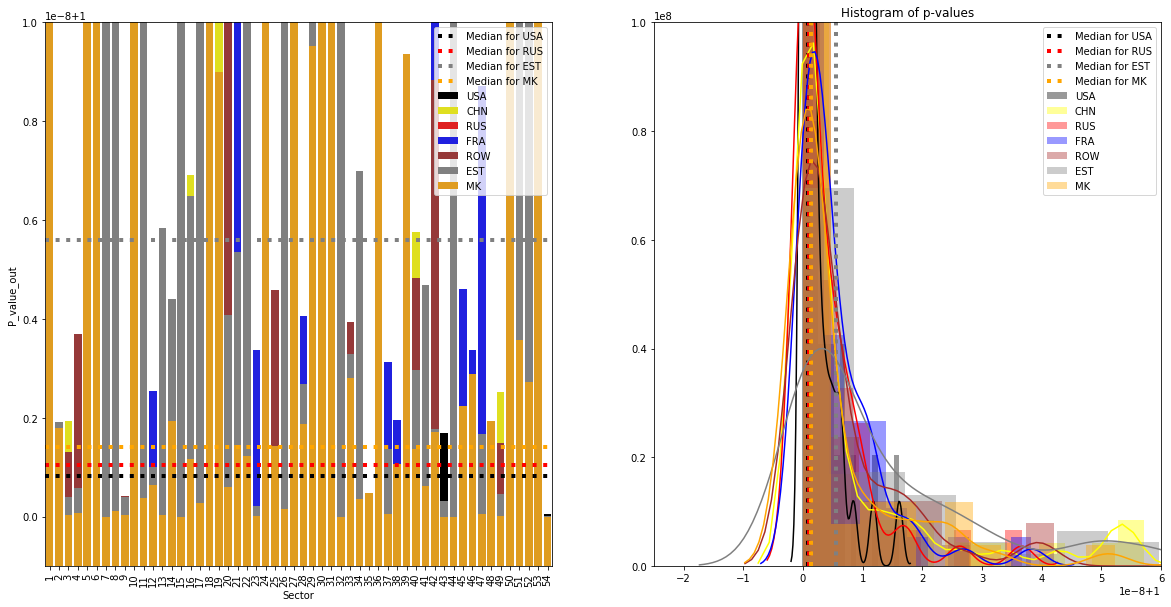

In [23]:
# Output analysis
merge_analysis_p(inp=False)

In [10]:
# We can also sort and take the first 5 sectors with biggest p impact for each representative country
# and plot that
colors = ['green','orange','red','purple','blue','green']

from colour import Color
colors = [Color(color) for color in colors]

sector_names = ['Crop and animal production, hunting and related service activities',
'Forestry and logging',
'Fishing and aquaculture',
'Mining and quarrying',
'Manufacture of food products, beverages and tobacco products',
'Manufacture of textiles, wearing apparel and leather products',
'Manufacture of wood and of products of wood and cork, except furniture; manufacture of articles of straw and plaiting materials',
'Manufacture of paper and paper products',
'Printing and reproduction of recorded media',
'Manufacture of coke and refined petroleum products ',
'Manufacture of chemicals and chemical products ',
'Manufacture of basic pharmaceutical products and pharmaceutical preparations',
'Manufacture of rubber and plastic products',
'Manufacture of other non-metallic mineral products',
'Manufacture of basic metals',
'Manufacture of fabricated metal products, except machinery and equipment',
'Manufacture of computer, electronic and optical products',
'Manufacture of electrical equipment',
'Manufacture of machinery and equipment n.e.c.',
'Manufacture of motor vehicles, trailers and semi-trailers',
'Manufacture of other transport equipment',
'Manufacture of furniture; other manufacturing',
'Repair and installation of machinery and equipment',
'Electricity, gas, steam and air conditioning supply',
'Water collection, treatment and supply',
'Sewerage; waste collection, treatment and disposal activities; materials recovery; remediation activities and other waste management services ',
'Construction',
'Wholesale and retail trade and repair of motor vehicles and motorcycles',
'Wholesale trade, except of motor vehicles and motorcycles',
'Retail trade, except of motor vehicles and motorcycles',
'Land transport and transport via pipelines',
'Water transport',
'Air transport',
'Warehousing and support activities for transportation',
'Postal and courier activities',
'Accommodation and food service activities',
'Publishing activities',
'Motion picture, video and television programme production, sound recording and music publishing activities; programming and broadcasting activities',
'Telecommunications',
'Computer programming, consultancy and related activities; information service activities',
'Financial service activities, except insurance and pension funding',
'Insurance, reinsurance and pension funding, except compulsory social security',
'Activities auxiliary to financial services and insurance activities',
'Real estate activities',
'Legal and accounting activities; activities of head offices; management consultancy activities',
'Architectural and engineering activities; technical testing and analysis',
'Scientific research and development',
'Advertising and market research',
'Other professional, scientific and technical activities; veterinary activities',
'Administrative and support service activities',
'Public administration and defence; compulsory social security',
'Education',
'Human health and social work activities',
'Activities of households as employers; undifferentiated goods- and services-producing activities of households for own use']

def show_top_sectors(inp=True):
    if inp:
        cols=['c'+str(idx)+'_in_p' for idx in range(1,55)]
    else:
        cols=['c'+str(idx)+'_out_p' for idx in range(1,55)]

    df = df_2010[df_2010['Country'].isin(representatives)].loc[:,['Country']+cols]
    
    plt.figure(figsize=(25,15))
    plt.subplots_adjust(bottom=0.2, top=3,hspace=0.5)
    stds = []
    
    for idx,country in enumerate(representatives):
        vals = df[df['Country']==country].iloc[0,1:].values
        values_series = pd.Series(vals)
        stats = print_stat(values_series,verbose=False)
        stds.append(stats['Std'])
        
    for idx,country in enumerate(representatives):
        vals = df[df['Country']==country].iloc[0,1:]
        country_dict={}
        for test_idx,val in enumerate(vals):
            country_dict[test_idx]=val
        country_dict = {k: v for k, v in sorted(country_dict.items(), key=lambda item: -item[1])}
        top_5 = list(country_dict.items())[:5]
        transformed = list(map(list, zip(*top_5)))
        df_sectors = pd.DataFrame()
        df_sectors['Sector'] = [sector_names[index] for index in transformed[0]]
        if inp:
            name = 'P_value_'+'in'
        else:
            name = 'P_value_'+'out'
        df_sectors[name] = transformed[1]
        plt.subplot(3,2,(idx+1))  
        plt.title(country)
        graph=sns.barplot(x='Sector',y=name,data=df_sectors)
        intern_idx=0
        vals=[]
        vals.append(transformed[1][0])
        for country_in in representatives:
            if country_in!=country:
                inner_colors = list(colors[intern_idx].range_to(colors[intern_idx+1],6))
                intern_idx = intern_idx+1
                for i in range(5):
                    sector_name = df_sectors['Sector'].values[i]
                    sector_no = sector_names.index(sector_name)+1
                    if inp:
                        col_name = 'c'+str(sector_no)+'_in_p'
                        label = 'P_in value for sector '+str(i+1)+' for '+country_in
                    else:
                        col_name = 'c'+str(sector_no)+'_out_p'
                        label = 'P_out value for sector '+str(i+1)+' for '+country_in
                    p_val = df[df['Country']==country_in].loc[:,col_name].values[0]
                    vals.append(p_val)
                    print(type(inner_colors[i]))
                    graph.axhline(p_val,label=label,linewidth=2,ls='-',c=inner_colors[i].rgb)
#         for median,country_in,color in zip(medians,representatives,colors):
#             graph.axhline(median,label=label,color=color,linewidth=4,ls=':')
        plt.xticks(rotation=45)
        graph.legend()
        graph.set_ylim([1,np.max(np.array(vals))+stds[0]])
        
    plt.savefig('merge_p_in.jpg',bbox_inches='tight')
    plt.show()
# high_gdp_repr = ['USA','CHN','JPN','DEU','IND']
# medium_gdp_repr = ['FRA','CAN','RUS','ESP','TUR']
# low_gdp_repr = ['MK','ROW','CYP','EST','LTU']

In [156]:
# Analyzing input sectors
show_top_sectors()

<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'col

In [146]:
# Analyzing output sectors
show_top_sectors(inp=False)

<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'colour.Color'>
<class 'col

In [40]:
# C vectors analysis

def basic_information_c_vector(country_set):
    cols=['c'+str(idx)+'_C_val' for idx in range(1,55)]
    df = df_2010[df_2010['Country'].isin(country_set)].loc[:,['Country']+cols]
    idx_out=0
    for country in country_set:
        plt.figure(figsize=(20,15))
        vals = df[df['Country']==country].iloc[0,1:].values
        values_series = pd.Series(vals)
        print("Printing statistics for c-values for country ",country)
        stats = print_stat(values_series)
        df_new = pd.DataFrame()
        df_new['Sector'] = list(range(1,55))
        df_new['C_value'] = values_series.values
        plt.subplot(1,2,1)
        plt.title("Per sector c-values for country "+country)
        sns.barplot(x='Sector',y='C_value',data=df_new,color='r')
        plt.xticks(rotation='vertical')
        plt.subplot(1,2,2)
        plt.title("Pie chart of fractions per sector for country "+country)
        country_dict={}
        for test_idx,val in enumerate(vals):
            country_dict[test_idx]=val
        country_dict = {k: v for k, v in sorted(country_dict.items(), key=lambda item: -item[1])}
        end_dict = {}
        top_5 = list(country_dict.items())[:5]
        for top in top_5:
            end_dict[top[0]]=top[1]
        end_dict['Other sectors']=reduce(lambda a,b:a+b,list(map(lambda item:item[1],list(country_dict.items())[5:])))
        labels = ['Sector no: '+str(int(key)+1) if key!='Other sectors' else key for key in list(end_dict.keys())]
        plt.pie(list(end_dict.values()),labels=labels,autopct='%1.1f%%')
        plt.legend([sector_names[idx] if idx!='Other sectors' else 'Other sectors' for idx in list(end_dict.keys())],
                  title='Sectors',loc='upper center')
        file_name = 'pie_'+country+'.png'
        plt.savefig(file_name)
        #plt.show()

In [24]:
# For high gdps
basic_information_c_vector(high_gdp_repr)

Printing statistics for c-values for country  USA
Product:  0.0
Geometric mean:  0.0
Mean:  1.8518518518518514
Median:  0.6172839506172839
Max:  32.71604938271605  for sector  51
Min:  0.0  for sector  6
Std:  5.7256883850316465
dict_values([32.71604938271605, 25.308641975308642, 14.814814814814815, 2.4691358024691357, 1.8518518518518519])


TypeError: savefig() missing 1 required positional argument: 'fname'

Printing statistics for c-values for country  FRA
Mean:  1.8518518518518516
Median:  0.6172839506172839
Max:  32.71604938271605  for sector  44
Min:  0.0  for sector  2
Std:  5.280761743462321


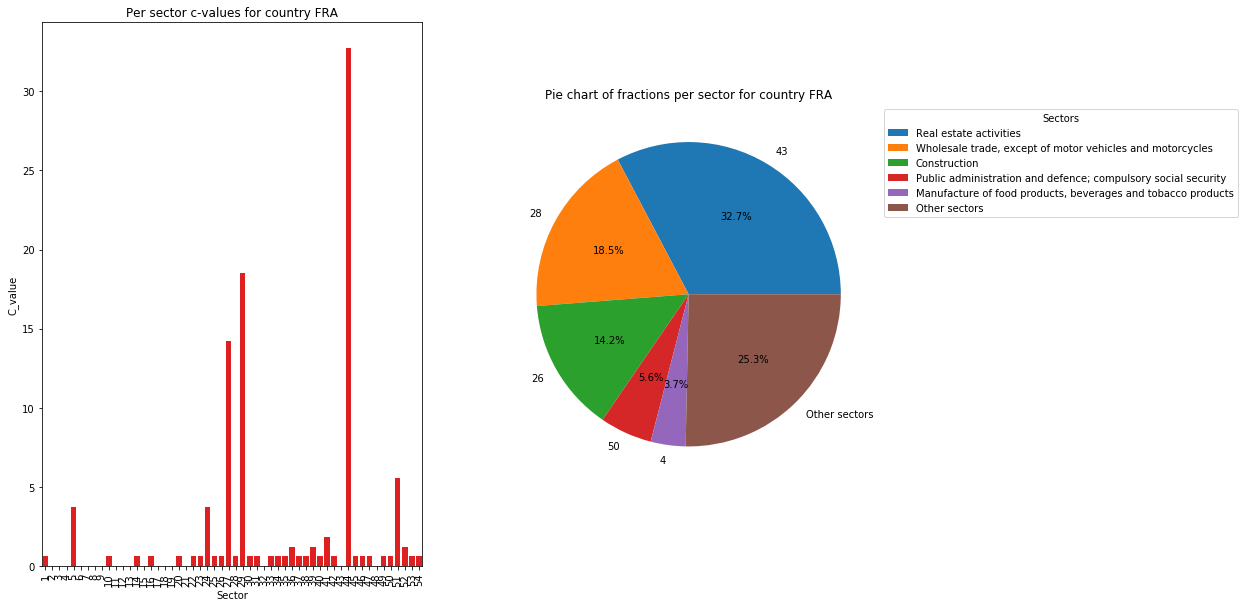

Printing statistics for c-values for country  CAN
Mean:  1.8518518518518514
Median:  0.6172839506172839
Max:  26.54320987654321  for sector  44
Min:  0.0  for sector  2
Std:  4.896658230069008


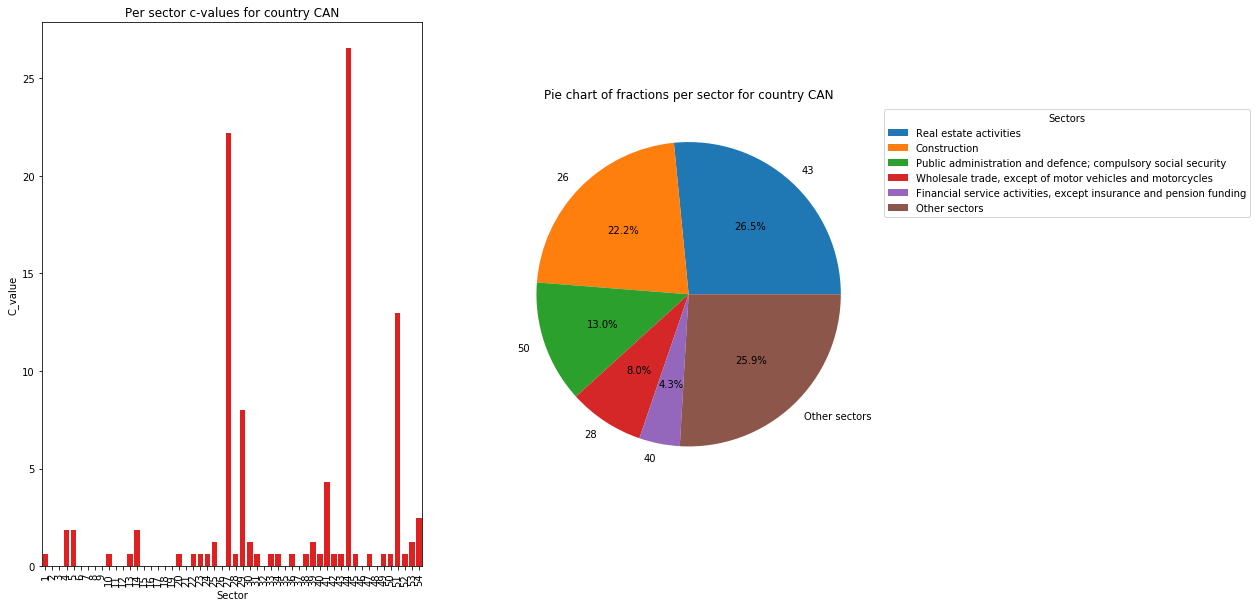

Printing statistics for c-values for country  RUS
Mean:  1.8518518518518507
Median:  0.6172839506172839
Max:  19.753086419753085  for sector  29
Min:  0.0  for sector  4
Std:  3.559928469783533


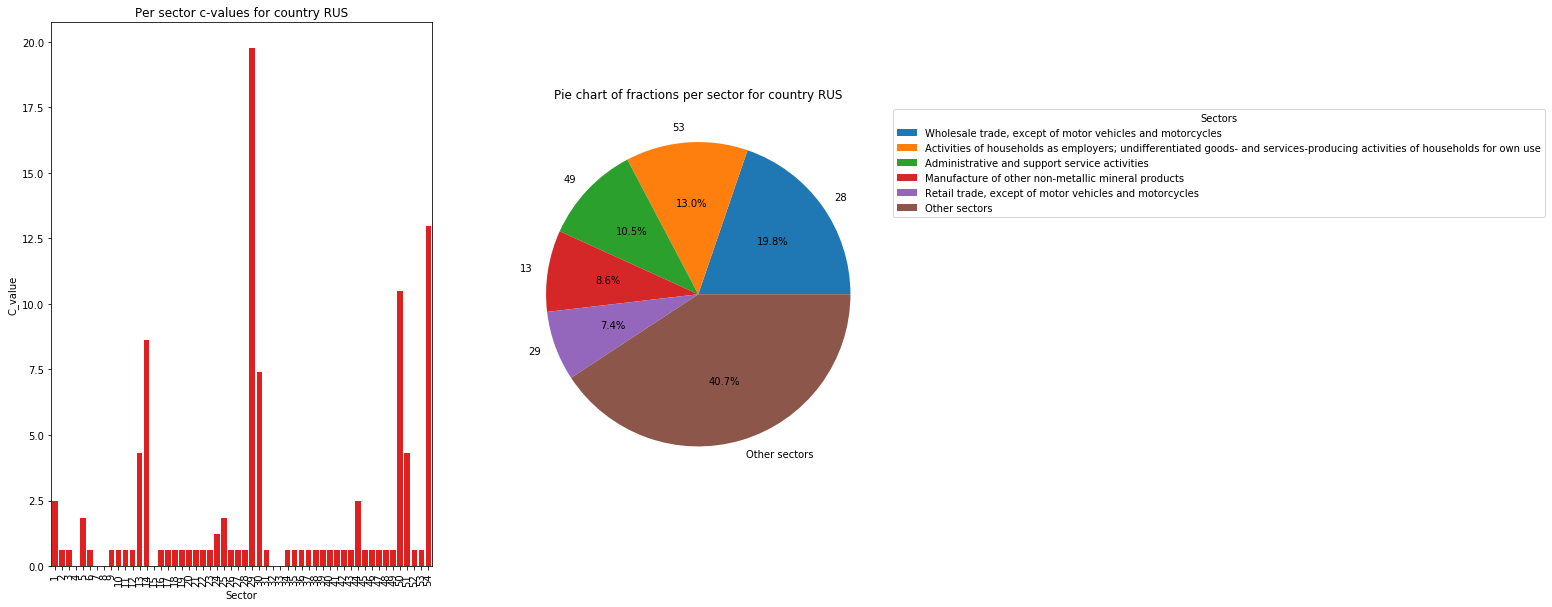

Printing statistics for c-values for country  ESP
Mean:  1.8518518518518503
Median:  0.6172839506172839
Max:  31.48148148148148  for sector  27
Min:  0.0  for sector  2
Std:  5.282097799585777


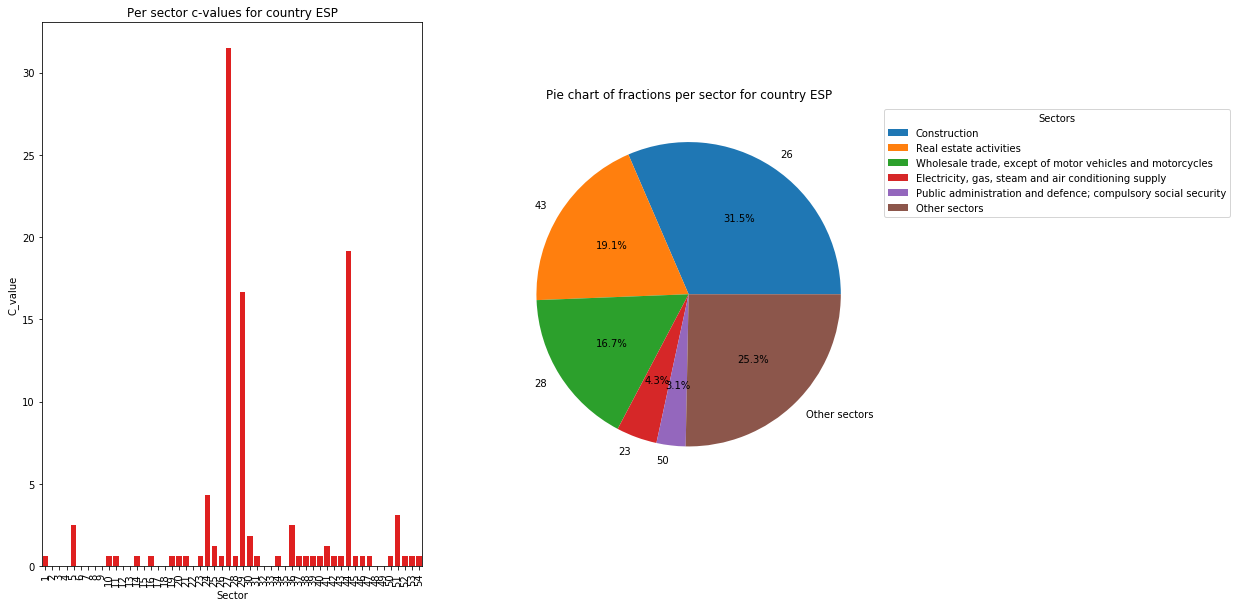

Printing statistics for c-values for country  TUR
Mean:  1.8518518518518505
Median:  0.6172839506172839
Max:  27.160493827160494  for sector  31
Min:  0.0  for sector  3
Std:  4.628486370041973


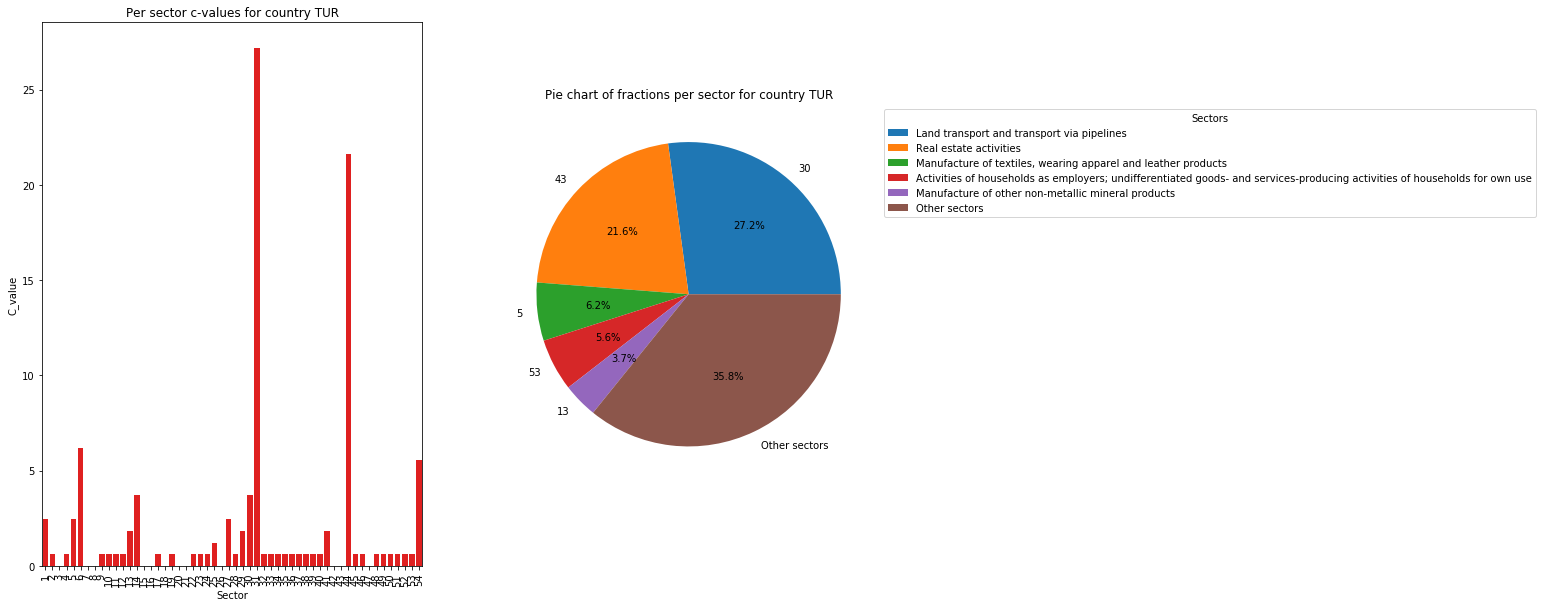

In [29]:
# For medium gdps
basic_information_c_vector(medium_gdp_repr)

Printing statistics for c-values for country  MK
Mean:  1.8518518518518507
Median:  0.6172839506172839
Max:  22.22222222222222  for sector  24
Min:  0.0  for sector  3
Std:  4.332403757847395


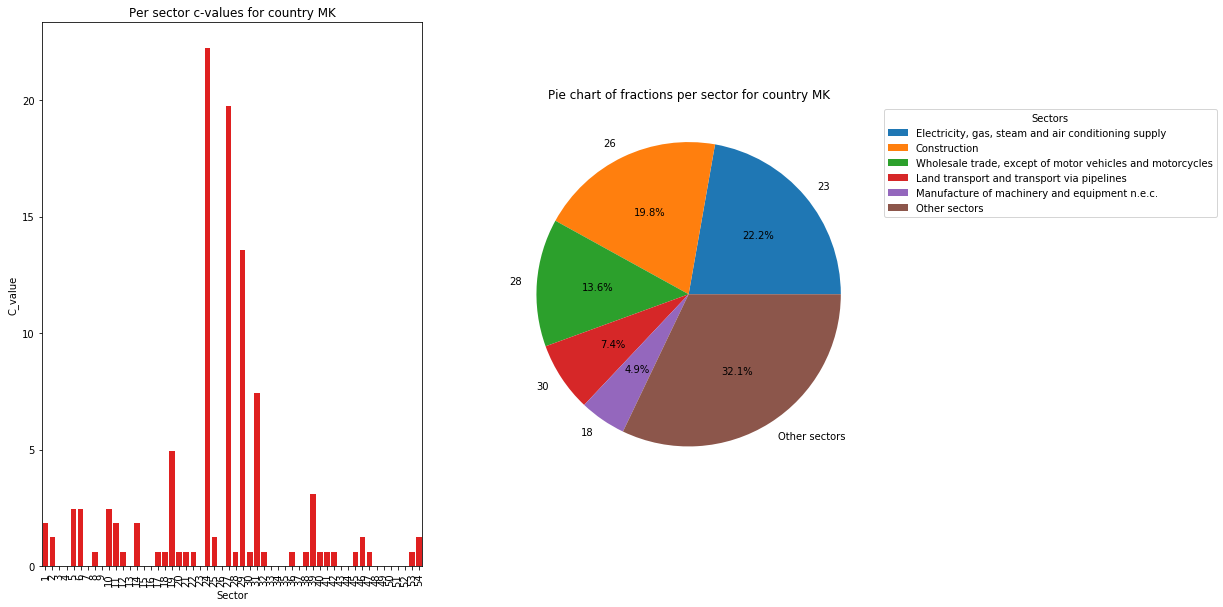

Printing statistics for c-values for country  ROW
Mean:  1.8518518518518505
Median:  0.6172839506172839
Max:  29.62962962962963  for sector  24
Min:  0.0  for sector  2
Std:  5.611163047934594


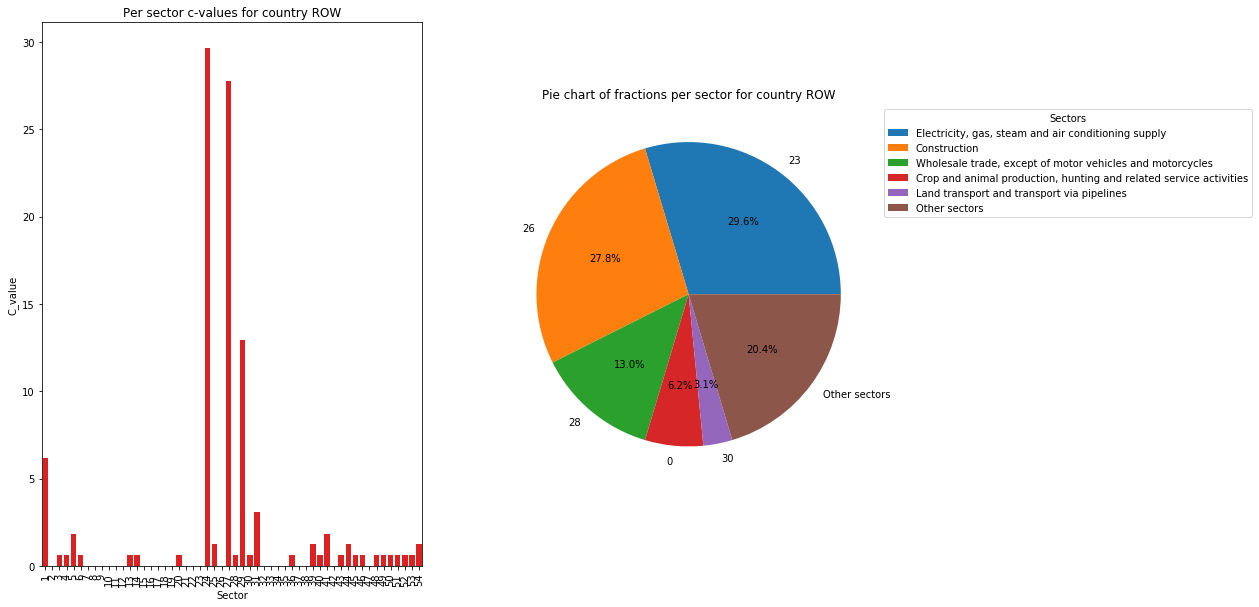

Printing statistics for c-values for country  CYP
Mean:  1.8518518518518514
Median:  0.6172839506172839
Max:  29.012345679012345  for sector  44
Min:  0.0  for sector  3
Std:  5.408822809915603


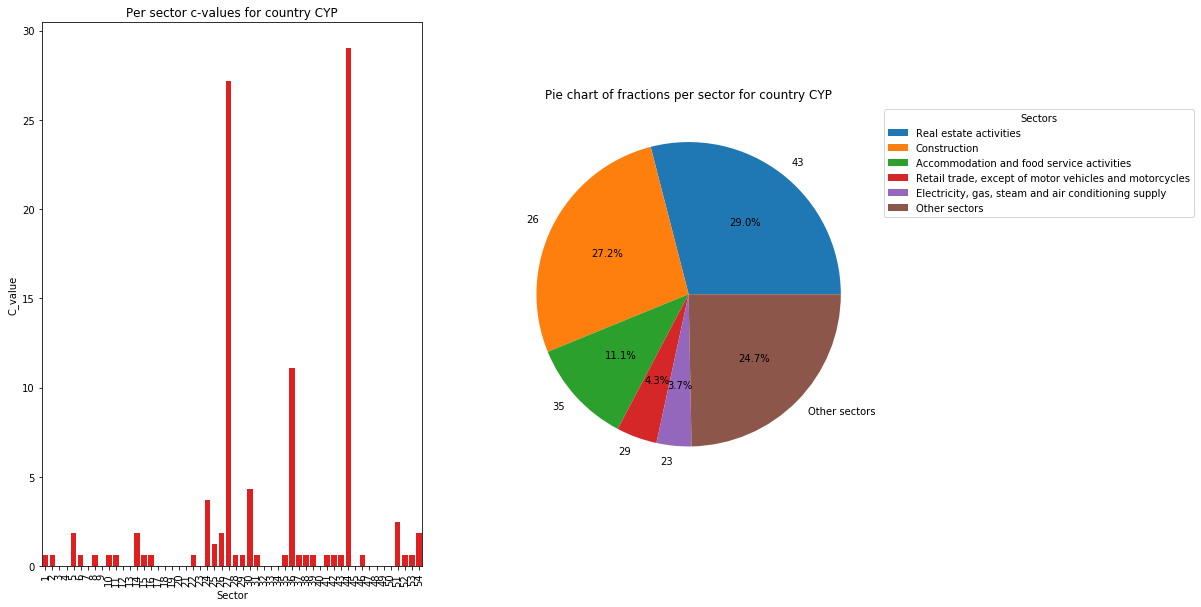

Printing statistics for c-values for country  EST
Mean:  1.8518518518518514
Median:  0.6172839506172839
Max:  31.48148148148148  for sector  44
Min:  0.0  for sector  2
Std:  5.528818453721977


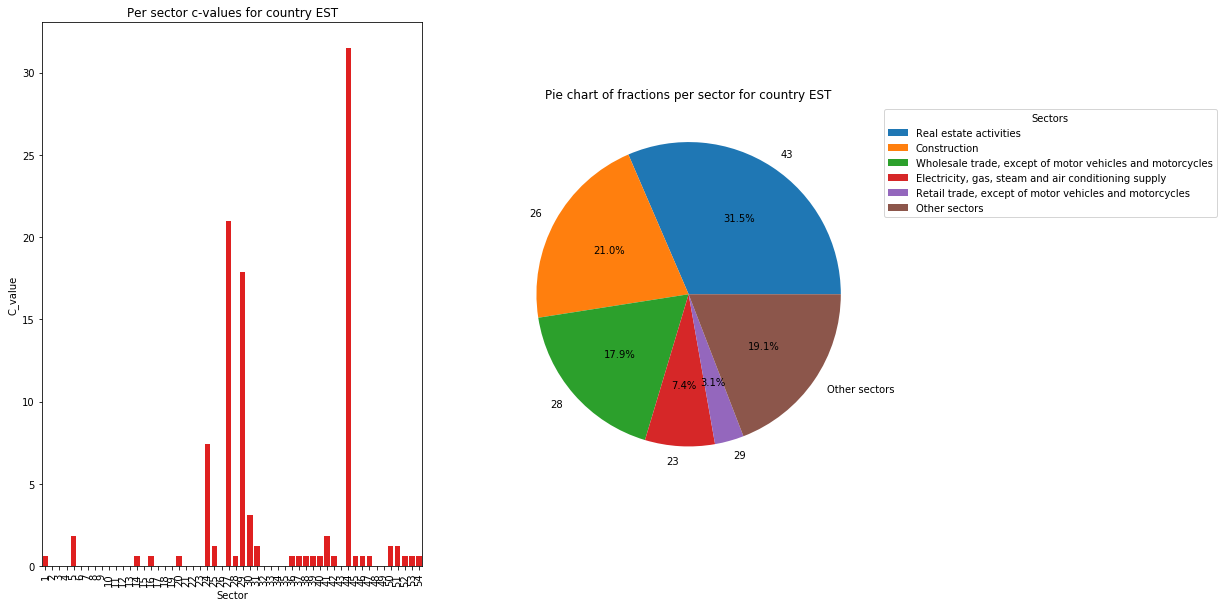

Printing statistics for c-values for country  LTU
Mean:  1.8518518518518503
Median:  0.6172839506172839
Max:  24.691358024691358  for sector  24
Min:  0.0  for sector  3
Std:  4.350282821371599


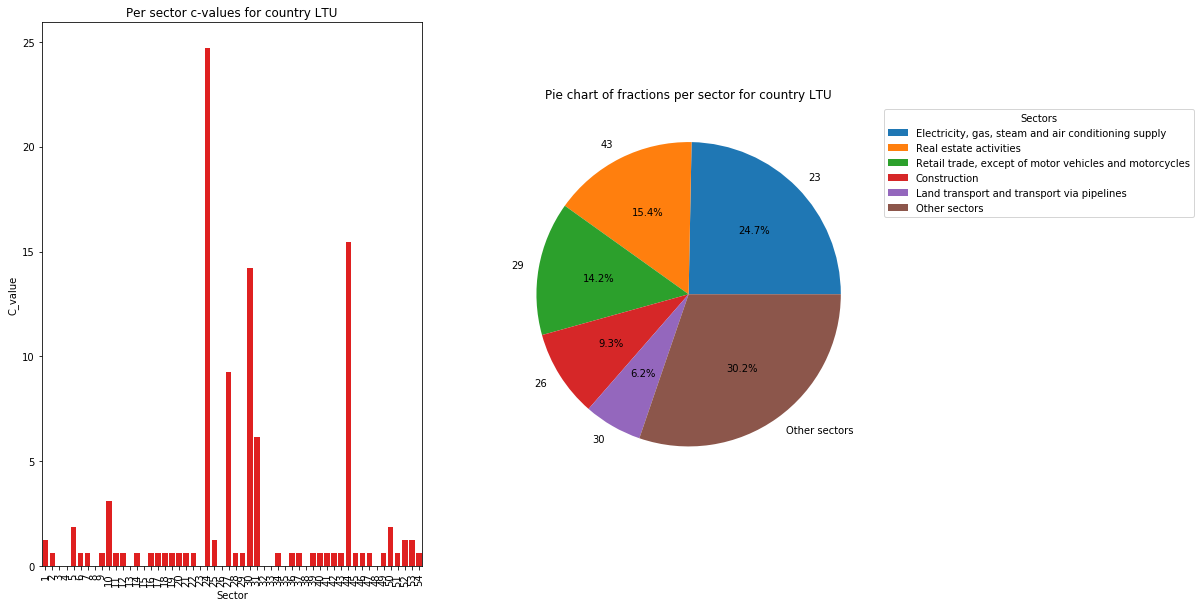

In [30]:
# For low gdps
basic_information_c_vector(low_gdp_repr)

In [41]:
basic_information_c_vector(representatives)

Printing statistics for c-values for country  USA
Product:  0.0
Geometric mean:  0.0
Mean:  1.8518518518518514
Median:  0.6172839506172839
Max:  32.71604938271605  for sector  51
Min:  0.0  for sector  6
Std:  5.7256883850316465
Printing statistics for c-values for country  CHN
Product:  0.0
Geometric mean:  0.0
Mean:  1.8518518518518503
Median:  0.6172839506172839
Max:  20.987654320987655  for sector  5
Min:  0.0  for sector  2
Std:  3.6769341985405237
Printing statistics for c-values for country  FRA
Product:  0.0
Geometric mean:  0.0
Mean:  1.8518518518518516
Median:  0.6172839506172839
Max:  32.71604938271605  for sector  44
Min:  0.0  for sector  2
Std:  5.280761743462321
Printing statistics for c-values for country  RUS
Product:  0.0
Geometric mean:  0.0
Mean:  1.8518518518518507
Median:  0.6172839506172839
Max:  19.753086419753085  for sector  29
Min:  0.0  for sector  4
Std:  3.559928469783533
Printing statistics for c-values for country  MK
Product:  0.0
Geometric mean:  0.0
M

In [12]:
# Per sector analysis for all countries in 2010 for C values

plt.figure(figsize=(15,10))
num_countries = len(np.unique(df_2010['Country']))
cols=['c'+str(idx)+'_C_val' for idx in range(1,55)]
df = df_2010.loc[:,cols]
sum_c=df.sum(axis=0)/num_countries
c_dict = {}
for idx,val in enumerate(sum_c.values):
    c_dict[sector_names[idx]]=val
    
c_dict={k: v for k, v in sorted(c_dict.items(), key=lambda item: -item[1])}
df_new = pd.DataFrame()
df_new['Sector'] = c_dict.keys()
df_new['C_value_across_countries'] = c_dict.values()
plt.title("Per sector c-values for all countries(summed)")
sns.barplot(x='Sector',y='C_value_across_countries',data=df_new,color='r')
plt.xticks(rotation='vertical')
plt.savefig('c_affection_dist',bbox_inches='tight')
plt.show()

In [162]:
# Analyzing the sectors p_in and p_out distributions separately
colors = ['black','red','gray','orange','purple','aqua']
type_colors=['blue','green']
sectors = ['Construction','Public administration and defence; compulsory social security','Manufacture of food products, beverages and tobacco products',
          'Electricity, gas, steam and air conditioning supply','Legal and accounting activities; activities of head offices; management consultancy activities',
          'Administrative and support service activities']
def visualize_sectors_p_values(representatives):
    plt.figure(figsize=(30,15))
    plt.subplots_adjust(left=0.125, bottom=0.5, right=1, top=1.5, wspace=0.25, hspace=0.2)
    idx_out=0
    for sector in sector_names:
        if sector in sectors:
            plt.subplot(3,2,idx_out+1)
            idx_out=idx_out+1
            sector_no = sector_names.index(sector)+1
            sector_name_in = 'c'+str(sector_no)+'_in_p'
            sector_name_out = 'c'+str(sector_no)+'_out_p'
            df = df_2010.loc[:,['Country',sector_name_in,sector_name_out]]
            representative_points = [df[df['Country']==representative]
                                     for representative in representatives]
            plt.title('Distribution of p-values across all countries for the sector '+sector+' as input and output')
            sector_types=[sector_name_in,sector_name_out]
            idx=1
            repr_rights = []
            for sector_type,type_color in zip(sector_types,type_colors):
                type_='input'
                if 'in' in sector_type:
                    graph_label='Distribution input for '+sector
                else:
                    graph_label='Distribution output for '+sector
                    type_='output'


                graph = sns.distplot(df[sector_type].values, color=type_color,
                                    label=graph_label,hist=False)

                values_series_in = pd.Series(df[sector_type].values)
                print("Printing statistics for the sector ",sector," as ",type_)
                stats=print_stat(values_series_in)
                for points,color in zip(representative_points,colors):
                    representative_p = points[sector_type].values[0]
                    repr_rights.append(representative_p)
                    country = points['Country'].values[0]
                    if 'in' in sector_type:
                        graph.axvline(representative_p,label=country+'_in : '+str(representative_p),color=color,linewidth=1,ls='--')
                        plt.text(representative_p,(idx/14)*plt.ylim()[1],country+'_in',rotation=90)
                    else:
                        graph.axvline(representative_p,label=country+'_out : '+str(representative_p),color=color,linewidth=1,ls='--')
                        plt.text(representative_p,(idx/14)*plt.ylim()[1],country+'_out',rotation=90)
                    idx = idx+1
            repr_rights.sort()
            largest = repr_rights[-1]
            plt.xlim(left=stats['Min']-stats['Std']/2,right=largest+stats['Std'])
            plt.xscale('log')
            graph.legend()
    plt.savefig('test_plot',bbox_inches='tight')
    plt.show()

In [163]:
# Visualizing all sectors as input/output
visualize_sectors_p_values(representatives)

Printing statistics for the sector  Manufacture of food products, beverages and tobacco products  as  input
Product:  1.000000978860539
Geometric mean:  1.000000021752446
Mean:  1.000000021752449
Median:  1.000000006984583
Max:  1.0000005128476144  for sector  26
Min:  1.0000000011340773  for sector  27
Std:  7.482865813258407e-08
Printing statistics for the sector  Manufacture of food products, beverages and tobacco products  as  output
Product:  1.0000025135366009
Geometric mean:  1.0000000558563003
Mean:  1.000000055856314
Median:  1.0000000270552356
Max:  1.0000011382666587  for sector  26
Min:  1.0000000048633024  for sector  17
Std:  1.646327079101851e-07
Printing statistics for the sector  Electricity, gas, steam and air conditioning supply  as  input
Product:  1.00000219854929
Geometric mean:  1.0000000488565983
Mean:  1.0000000488566054
Median:  1.0000000214714435
Max:  1.0000007962064918  for sector  26
Min:  1.0000000016733916  for sector  43
Std:  1.1830235949879235e-07
Pri

In [45]:
# Clustering analysis based on C vector for each country
cols=['c'+str(idx)+'_C_val' for idx in range(1,55)]
df = df_2010.loc[:,['Country']+cols]
X = []

for country_no in range(num_countries):
    data = df.iloc[country_no,1:].values
    X.append(data)
           
wcv = {}
bcv = {}
min_clusters = 2
max_clusters = 10

for k in range(min_clusters, max_clusters):
    kmeans = KMeans(init='k-means++', n_clusters=k, random_state=170, n_init=1, max_iter=1000).fit(X)
    wcv[k] = kmeans.inertia_
    centers = kmeans.cluster_centers_
    BCV = 0
    for i in range(len(centers)):
        for j in range(len(centers)):
            BCV += distance.euclidean(centers[i], centers[j]) ** 2
    if (k == 1):
        bcv[1] = 0
    else:
        bcv[k] = BCV / (k * (k - 1)) * 100
plt.figure(figsize=(15,10))
plt.title('BCV vs WCV for different k-values')
plt.plot(list(wcv.keys()), list(wcv.values()), label="Within Cluster Distance (WCV)")
plt.plot(list(bcv.keys()), list(bcv.values()), label="Between Cluster Distance (BCV)")
plt.xlabel("Number of clusters K")
plt.legend()
plt.show()


In [46]:
pca = PCA(n_components=2)
X_Pca_transformed = pca.fit_transform(X)
plt.figure(figsize=(10, 10))
plt.title("2D PCA transformed data")
plt.xlabel("First PCA")
plt.ylabel("Second PCA")
plt.scatter(X_Pca_transformed[:, 0], X_Pca_transformed[:, 1], edgecolor='k', s=40)
plt.show()

pca = PCA(n_components=None)
pca.fit(X)
X_PCA_transformed = pca.transform(X)
plt.figure()
sns.barplot(x=np.arange(np.array(X).shape[0]), y=pca.explained_variance_ratio_, color="c")
plt.xticks([])
plt.title("Explained Variance Ratio of Each Principle Component")
plt.show()

plt.figure()
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(np.arange(np.array(X).shape[0]), cumulative_explained_variance, color="c")
plt.xticks([])
plt.title("Cumulative Explained Variance Ratio of Principle Component")
plt.show()
res = list(map(lambda i: i > 0.9, cumulative_explained_variance)).index(True)
print("Cumulative variance of 90% reached at component", res)
for pc_num in range(0, res):
    print("Principal component number ", pc_num, " explains ", np.round(pca.explained_variance_ratio_[pc_num] * 100, 3),
          "% of the variation in the data")

Cumulative variance of 90% reached at component 6
Principal component number  0  explains  32.337 % of the variation in the data
Principal component number  1  explains  21.992 % of the variation in the data
Principal component number  2  explains  14.53 % of the variation in the data
Principal component number  3  explains  7.75 % of the variation in the data
Principal component number  4  explains  5.882 % of the variation in the data
Principal component number  5  explains  5.258 % of the variation in the data


In [47]:
# Taking k=5, visualizing

num_classes = 5
print("Now we train a K-means++ model using the K-value we found and see the iterations: ")

iterations = [1, 5, 10, 50, 100, 400]

fig2 = plt.figure(figsize=(9, 9))
plt.title("K-means iterations")
for i in range(len(iterations)):
    plt.subplot(2, 3, i + 1)
    estimator = KMeans(init='k-means++', n_clusters=num_classes, random_state=170, n_init=1, max_iter=iterations[i])
    y_pred = estimator.fit_predict(X_Pca_transformed)
    plt.scatter(X_Pca_transformed[:, 0], X_Pca_transformed[:, 1],)
    plt.scatter(estimator.cluster_centers_[:, 0], estimator.cluster_centers_[:, 1], s=50, marker='x', color="black")
plt.show()

estimator = KMeans(init='k-means++', n_clusters=num_classes, random_state=170, n_init=1, max_iter = 100)
y_pred = estimator.fit_predict(X)

Now we train a K-means++ model using the K-value we found and see the iterations: 


In [48]:
# Printing clusters 
from termcolor import colored

clusters={}
for country_no in range(num_countries):
    country = df_2010.iloc[country_no,0]
    if y_pred[country_no] in clusters:
        clusters[y_pred[country_no]].append(country)
    else:
        clusters[y_pred[country_no]]=[country]
    
clusters = {k:v for k,v in sorted(clusters.items(), key=lambda item: item[0])}
for cluster_no, country_list in clusters.items():
    print('\nThe countries: ')   
    for country in country_list:
        if country in high_gdp_repr:
            print(colored(country,'green'),end=', ')
        elif country in medium_gdp_repr:
            print(colored(country,'yellow'),end=', ')
        elif country in low_gdp_repr:
            print(colored(country,'red'),end=', ')
        else:
            print(country,end=', ')
    print('all belong to the cluster ',cluster_no)
    
print('\nGreen colors represent',colored('high gdp countries','green'))
print('Yellow colors represent',colored('medium gdp countries','yellow'))
print('Red colors represent',colored('low gdp countries','red'))


The countries: 
CAN, DEU, FRA, GRC, HUN, IRL, KOR, NOR, TUR, USA, all belong to the cluster  0

The countries: 
BRA, IND, LTU, MLT, ROU, SVK, ROW, MK, all belong to the cluster  1

The countries: 
CHE, CHN, IDN, JPN, MEX, RUS, TWN, all belong to the cluster  2

The countries: 
AUS, AUT, BEL, CZE, DNK, ESP, EST, GBR, ITA, NLD, POL, SWE, all belong to the cluster  3

The countries: 
BGR, CYP, FIN, HRV, LUX, LVA, PRT, SVN, all belong to the cluster  4

Green colors represent high gdp countries
Yellow colors represent medium gdp countries
Red colors represent low gdp countries


In [49]:
# Silhoutte analysis 

# SILHOUETTE ANALYSIS ON K-MEANS


scores={}
for num_clusters in range(2,15):
    clusterer = KMeans(init='k-means++', n_clusters=num_clusters, random_state=170, n_init=1, max_iter=100)
    clusterer.fit(X)
    cluster_labels = clusterer.predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
#     print("For n_clusters =", num_clusters,
#           "The average silhouette_score is :", silhouette_avg)
    scores[num_clusters]=silhouette_avg
    
sorted_scores = {k:v for k,v in sorted(scores.items(), key=lambda item: -item[1])}
plt.figure(figsize=(30,15))
plt.subplots_adjust(left=0.125, bottom=0.5, right=2, top=3, wspace=0.2, hspace=0.4)
index=1
for num_cluster, score in (list(sorted_scores.items())[:5]+[(num_classes,sorted_scores[num_classes])]):
    clusterer = KMeans(init='k-means++', n_clusters=num_cluster, random_state=170, n_init=1, max_iter=100)
    clusterer.fit(X)
    cluster_labels = clusterer.predict(X)
    print('Number of clusters: ',num_cluster,'. The average silhouette_score is :',score)
    plt.subplot(3,2,index)
    index=index+1
    fig=plt.gcf()
    fig.set_size_inches(9, 6)
    ax = plt.gca()
    plt.xlim([-0.25, 1])
    plt.ylim([0, len(X) + (num_cluster + 1) * 10])
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(num_cluster):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / num_cluster)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=score, color="red", linestyle="--",label='average='+str(score))
    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.title(("Silhouette analysis for KMeans++ clustering on sample data "
                  "with n_clusters = %d" % num_cluster),
                 fontsize=12, fontweight='bold')
    plt.legend()
plt.show()

Number of clusters:  3 . The average silhouette_score is : 0.30156733986575446
Number of clusters:  2 . The average silhouette_score is : 0.296381618905975
Number of clusters:  4 . The average silhouette_score is : 0.2243166631915981
Number of clusters:  6 . The average silhouette_score is : 0.1970819101532116
Number of clusters:  8 . The average silhouette_score is : 0.1939570847351096
Number of clusters:  5 . The average silhouette_score is : 0.16964713285302693


In [50]:
#GMM

# GMM
# Try GMMs using different types of covariances.

colors = ['navy', 'turquoise', 'darkorange', 'red', 'green', 'blue', 'black']
X=np.array(X)
# FUNCTION to draw elipses based on the type of cov matrix
def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

print("Finding best k for each type of cov matrix. ")

fig=plt.figure(figsize=(15,10))
for idx,matrix_type in enumerate(['full','tied','diag','spherical']):
    plt.subplot(2,2,idx+1)
    k_value = {}
    bic_score = {}

    iterations = 500
    for k in range(2,9):
        estimator = GaussianMixture(n_components=k,
                                    covariance_type=matrix_type, init_params="random", n_init=1,
                                    max_iter=iterations,
                                    random_state=100)
        k_value[k] = k
        estimator.fit(X)
        bic_score[k] = estimator.bic(X)
    plt.plot(list(k_value.keys()), list(k_value.values()), label="K-values")
    plt.plot(list(bic_score.keys()), list(bic_score.values()), label="Bic score")
    plt.xlabel("Number of clusters K")
    plt.title(matrix_type+" cov matrix K value")
    plt.legend()
    print('BIC score for k=',num_classes,' is ',bic_score[5])
    print("Best k for ",matrix_type," is: ", min(bic_score, key=bic_score.get), " = ",
      bic_score[min(bic_score, key=bic_score.get)])
plt.show()

Finding best k for each type of cov matrix. 
BIC score for k= 5  is  7761.739683365773
Best k for  full  is:  2  =  -2050.105166186333
BIC score for k= 5  is  2857.9238386175025
Best k for  tied  is:  8  =  1948.8037169747904
BIC score for k= 5  is  3611.2438074349866
Best k for  diag  is:  7  =  2300.390632667192
BIC score for k= 5  is  11439.306586664057
Best k for  spherical  is:  7  =  10761.084121385255


In [51]:
# Final assumption, k=6
num_classes=6

In [52]:
# Clustering using k-means++
print("Clustering using K-means++")
estimator = KMeans(init='k-means++', n_clusters=num_classes, random_state=170, n_init=1, max_iter = 100)
y_pred = estimator.fit_predict(X)
clusters_kmeans={}
for country_no in range(num_countries):
    country = df_2010.iloc[country_no,0]
    if y_pred[country_no] in clusters_kmeans:
        clusters_kmeans[y_pred[country_no]].append(country)
    else:
        clusters_kmeans[y_pred[country_no]]=[country]
    
clusters_kmeans = {k:v for k,v in sorted(clusters_kmeans.items(), key=lambda item: item[0])}
for cluster_no, country_list in clusters_kmeans.items():
    print('\nThe countries: ')   
    for country in country_list:
        if country in high_gdp_repr:
            print(colored(country,'green'),end=', ')
        elif country in medium_gdp_repr:
            print(colored(country,'yellow'),end=', ')
        elif country in low_gdp_repr:
            print(colored(country,'red'),end=', ')
        else:
            print(country,end=', ')
    print('all belong to the cluster ',cluster_no)
    
print('\nGreen colors represent',colored('high gdp countries','green'))
print('Yellow colors represent',colored('medium gdp countries','yellow'))
print('Red colors represent',colored('low gdp countries','red'))

Clustering using K-means++

The countries: 
CAN, DEU, FRA, GRC, HUN, IRL, KOR, NOR, USA, all belong to the cluster  0

The countries: 
LTU, MLT, ROU, SVK, ROW, MK, all belong to the cluster  1

The countries: 
BRA, CHE, CHN, IDN, JPN, MEX, RUS, TWN, all belong to the cluster  2

The countries: 
AUS, AUT, BEL, CZE, DNK, ESP, EST, GBR, ITA, NLD, POL, SWE, all belong to the cluster  3

The countries: 
BGR, CYP, FIN, HRV, LUX, LVA, PRT, SVN, all belong to the cluster  4

The countries: 
IND, TUR, all belong to the cluster  5

Green colors represent high gdp countries
Yellow colors represent medium gdp countries
Red colors represent low gdp countries


In [53]:
# Clustering using gmm
print("Finding best k for each type of cov matrix. ")
k=num_classes
for idx,matrix_type in enumerate(['full','tied','diag','spherical']):
    k_value = {}
    bic_score = {}

    iterations = 500
    estimator = GaussianMixture(n_components=k,
                                covariance_type=matrix_type, init_params="random", n_init=1,
                                max_iter=iterations,
                                random_state=100)
    k_value[k] = k
    estimator.fit(X)
    bic_score[k] = estimator.bic(X)
    print('BIC score for k=',num_classes,' is ',bic_score[num_classes])
    print("Best k for ",matrix_type," is: ", min(bic_score, key=bic_score.get), " = ",
      bic_score[min(bic_score, key=bic_score.get)])


Finding best k for each type of cov matrix. 
BIC score for k= 6  is  11818.644384549236
Best k for  full  is:  6  =  11818.644384549236
BIC score for k= 6  is  2557.4316832729746
Best k for  tied  is:  6  =  2557.4316832729746
BIC score for k= 6  is  2559.42919378573
Best k for  diag  is:  6  =  2559.42919378573
BIC score for k= 6  is  11205.662379409796
Best k for  spherical  is:  6  =  11205.662379409796


In [54]:
# USING A TIED MATRIX
print("Clustering using GMM")
estimator = GaussianMixture(n_components=num_classes,
                                covariance_type='tied', init_params="random", n_init=1,
                                max_iter=100,
                                random_state=100)
y_pred = estimator.fit_predict(X)
clusters_gmm={}
for country_no in range(num_countries):
    country = df_2010.iloc[country_no,0]
    if y_pred[country_no] in clusters_gmm:
        clusters_gmm[y_pred[country_no]].append(country)
    else:
        clusters_gmm[y_pred[country_no]]=[country]
    
clusters_gmm = {k:v for k,v in sorted(clusters_gmm.items(), key=lambda item: item[0])}
for cluster_no, country_list in clusters_gmm.items():
    print('\nThe countries: ')   
    for country in country_list:
        if country in high_gdp_repr:
            print(colored(country,'green'),end=', ')
        elif country in medium_gdp_repr:
            print(colored(country,'yellow'),end=', ')
        elif country in low_gdp_repr:
            print(colored(country,'red'),end=', ')
        else:
            print(country,end=', ')
    print('all belong to the cluster ',cluster_no)
    
print('\nGreen colors represent',colored('high gdp countries','green'))
print('Yellow colors represent',colored('medium gdp countries','yellow'))
print('Red colors represent',colored('low gdp countries','red'))

Clustering using GMM

The countries: 
DNK, HRV, LTU, ROU, RUS, SWE, MK, all belong to the cluster  0

The countries: 
AUT, GBR, IDN, ITA, LUX, LVA, MLT, NOR, SVK, TWN, USA, all belong to the cluster  1

The countries: 
CHE, CYP, ESP, FIN, IND, JPN, NLD, all belong to the cluster  2

The countries: 
AUS, BEL, BGR, KOR, PRT, TUR, all belong to the cluster  3

The countries: 
BRA, CHN, SVN, all belong to the cluster  4

The countries: 
CAN, CZE, DEU, EST, FRA, GRC, HUN, IRL, MEX, POL, ROW, all belong to the cluster  5

Green colors represent high gdp countries
Yellow colors represent medium gdp countries
Red colors represent low gdp countries


In [55]:
for (cluster_no, country_list_kmeans),(_,country_list_gmm) in zip(clusters_kmeans.items(),clusters_gmm.items()):
    print('\nCluster number: ',cluster_no)
    print('K-means results: ')
    for country in country_list_kmeans:
        if country in high_gdp_repr:
            print(colored(country,'green'),end=', ')
        elif country in medium_gdp_repr:
            print(colored(country,'yellow'),end=', ')
        elif country in low_gdp_repr:
            print(colored(country,'red'),end=', ')
        else:
            print(country,end=', ')
    print('\nGMM results: ')
    for country in country_list_gmm:
        if country in high_gdp_repr:
            print(colored(country,'green'),end=', ')
        elif country in medium_gdp_repr:
            print(colored(country,'yellow'),end=', ')
        elif country in low_gdp_repr:
            print(colored(country,'red'),end=', ')
        else:
            print(country,end=', ')
    print('\n\n')


Cluster number:  0
K-means results: 
CAN, DEU, FRA, GRC, HUN, IRL, KOR, NOR, USA, 
GMM results: 
DNK, HRV, LTU, ROU, RUS, SWE, MK, 



Cluster number:  1
K-means results: 
LTU, MLT, ROU, SVK, ROW, MK, 
GMM results: 
AUT, GBR, IDN, ITA, LUX, LVA, MLT, NOR, SVK, TWN, USA, 



Cluster number:  2
K-means results: 
BRA, CHE, CHN, IDN, JPN, MEX, RUS, TWN, 
GMM results: 
CHE, CYP, ESP, FIN, IND, JPN, NLD, 



Cluster number:  3
K-means results: 
AUS, AUT, BEL, CZE, DNK, ESP, EST, GBR, ITA, NLD, POL, SWE, 
GMM results: 
AUS, BEL, BGR, KOR, PRT, TUR, 



Cluster number:  4
K-means results: 
BGR, CYP, FIN, HRV, LUX, LVA, PRT, SVN, 
GMM results: 
BRA, CHN, SVN, 



Cluster number:  5
K-means results: 
IND, TUR, 
GMM results: 
CAN, CZE, DEU, EST, FRA, GRC, HUN, IRL, MEX, POL, ROW, 




In [56]:
# Deciding to take the k-means clusters as they make more sense if correlated with the GDP
final_clusters = clusters_kmeans

In [58]:
# Inner cluster analysis of C values:
all_countries = list(np.unique(df_2010['Country'].values))
representatives = high_gdp_repr+medium_gdp_repr+low_gdp_repr

for cluster_no, country_list_kmeans in clusters_kmeans.items():
    print('\nCluster number: ',cluster_no)
    for country in country_list_kmeans:
        if country in high_gdp_repr:
            print(colored(country,'green'),end=', ')
        elif country in medium_gdp_repr:
            print(colored(country,'yellow'),end=', ')
        elif country in low_gdp_repr:
            print(colored(country,'red'),end=', ')
        else:
            print(country,end=', ')
    print('\n\n')
    #basic_information_c_vector(country_list_kmeans)   
    plt.figure(figsize=(15,10))
    num_countries = len(country_list_kmeans)
    cols=['c'+str(idx)+'_C_val' for idx in range(1,55)]
    df = df_2010.loc[df_2010['Country'].isin(country_list_kmeans)].loc[:,cols]
    print(df.loc[:,'c27_C_val'].head())
    df_country = df_2010.loc[df_2010['Country'].isin(country_list_kmeans)].loc[:,cols+['Country']]
    test = df.sum(axis=0)
    total = np.sum(test.values)
    sum_c=test.values*100/total
    c_dict = {}
    for idx,val in enumerate(sum_c):
        c_dict[sector_names[idx]]=val

    c_dict={k: v for k, v in sorted(c_dict.items(), key=lambda item: -item[1])}
    #df_new = pd.DataFrame()
    #df_new['Sector'] = c_dict.keys()
    #df_new['C_value_across_countries'] = c_dict.values()
    #plt.title("Per sector c-values for countries in the cluster: "+str(cluster_no))
    #sns.barplot(x='Sector',y='C_value_across_countries',data=df_new,color='r')
    plt.xticks(rotation='vertical')
    #plt.show()
    
    cum_sum = np.cumsum(list(c_dict.values()))
    cum_thresh=80
    res = list(map(lambda i: i > cum_thresh, cum_sum)).index(True)
    print("Cumulative c-value of ",cum_thresh,"% reached at sector", res," of the top ones")
    for sector_name,c_value in list(c_dict.items())[:res]:
        print("Sector ", sector_name, " explains ", np.round(c_value, 3),
              "% of the c-value.")
    #plt.figure(figsize=(15,10))
    df_new = pd.DataFrame()
    df_new['Sector'] = list(c_dict.keys())[0:res]
    df_new['C_value_across_countries'] = list(c_dict.values())[0:res]
    plt.title("Per sector c-values for countries in the cluster: "+str(cluster_no)+' explaining '+str(cum_thresh)+'% of the c-values')
    sns.barplot(x='Sector',y='C_value_across_countries',data=df_new,color='r')
    #plt.xticks(rotation='vertical')
    plt.savefig('c_dist_cluster_'+str(cluster_no))
    plt.show()
    for country in country_list_kmeans:
        if country in representatives:
            if country in high_gdp_repr:
                print(colored(country,'green'),'\'s ratios for the top 3 sectors: ')
                
            elif country in medium_gdp_repr:
                print(colored(country,'yellow'),'\'s ratios for the top 3 sectors: ')
            elif country in low_gdp_repr:
                print(colored(country,'red'),'\'s ratios for the top 3 sectors: ')
            else:
                print(country,'\'s ratios for the top 3 sectors: ')
            for idx in range(3):
                    sector_name = list(c_dict.keys())[idx]
                    sector_no = sector_names.index(sector_name)+1
                    col_name = 'c'+str(sector_no)+'_C_val'
                    c_val = df_country[df_country['Country']==country].loc[:,col_name].values[0]
                    c_total = test[col_name]
                    print('For sector ',sector_name,' the total percentual from all the other countries in the cluster is: ',np.round((c_val*100)/c_total,3),'%')


Cluster number:  0
CAN, DEU, FRA, GRC, HUN, IRL, KOR, NOR, USA, 


445    22.222222
450    16.049383
455    14.197531
457    12.962963
459     4.938272
Name: c27_C_val, dtype: float64
Cumulative c-value of  80 % reached at sector 13  of the top ones
Sector  Real estate activities  explains  29.835 % of the c-value.
Sector  Construction  explains  11.591 % of the c-value.
Sector  Wholesale trade, except of motor vehicles and motorcycles  explains  10.974 % of the c-value.
Sector  Public administration and defence; compulsory social security  explains  8.985 % of the c-value.
Sector  Retail trade, except of motor vehicles and motorcycles  explains  3.429 % of the c-value.
Sector  Financial service activities, except insurance and pension funding  explains  2.538 % of the c-value.
Sector  Electricity, gas, steam and air conditioning supply  explains  2.195 % of the c-value.
Sector  Land transport and transport via pipelines  explains  2.058 % of the c-value.
Sector  Manufacture of food p

C:\Users\Marko\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


CAN 's ratios for the top 3 sectors: 
For sector  Real estate activities  the total percentual from all the other countries in the cluster is:  9.885 %
For sector  Construction  the total percentual from all the other countries in the cluster is:  21.302 %
For sector  Wholesale trade, except of motor vehicles and motorcycles  the total percentual from all the other countries in the cluster is:  8.125 %
DEU 's ratios for the top 3 sectors: 
For sector  Real estate activities  the total percentual from all the other countries in the cluster is:  12.184 %
For sector  Construction  the total percentual from all the other countries in the cluster is:  15.385 %
For sector  Wholesale trade, except of motor vehicles and motorcycles  the total percentual from all the other countries in the cluster is:  8.125 %
FRA 's ratios for the top 3 sectors: 
For sector  Real estate activities  the total percentual from all the other countries in the cluster is:  12.184 %
For sector  Construction  the tota

C:\Users\Marko\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


LTU 's ratios for the top 3 sectors: 
For sector  Construction  the total percentual from all the other countries in the cluster is:  6.438 %
For sector  Electricity, gas, steam and air conditioning supply  the total percentual from all the other countries in the cluster is:  17.467 %
For sector  Wholesale trade, except of motor vehicles and motorcycles  the total percentual from all the other countries in the cluster is:  1.695 %
ROW 's ratios for the top 3 sectors: 
For sector  Construction  the total percentual from all the other countries in the cluster is:  19.313 %
For sector  Electricity, gas, steam and air conditioning supply  the total percentual from all the other countries in the cluster is:  20.961 %
For sector  Wholesale trade, except of motor vehicles and motorcycles  the total percentual from all the other countries in the cluster is:  35.593 %
MK 's ratios for the top 3 sectors: 
For sector  Construction  the total percentual from all the other countries in the cluster 

C:\Users\Marko\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


CHN 's ratios for the top 3 sectors: 
For sector  Wholesale trade, except of motor vehicles and motorcycles  the total percentual from all the other countries in the cluster is:  5.172 %
For sector  Construction  the total percentual from all the other countries in the cluster is:  11.392 %
For sector  Retail trade, except of motor vehicles and motorcycles  the total percentual from all the other countries in the cluster is:  0.855 %
JPN 's ratios for the top 3 sectors: 
For sector  Wholesale trade, except of motor vehicles and motorcycles  the total percentual from all the other countries in the cluster is:  14.224 %
For sector  Construction  the total percentual from all the other countries in the cluster is:  19.62 %
For sector  Retail trade, except of motor vehicles and motorcycles  the total percentual from all the other countries in the cluster is:  3.419 %
RUS 's ratios for the top 3 sectors: 
For sector  Wholesale trade, except of motor vehicles and motorcycles  the total perce

C:\Users\Marko\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


ESP 's ratios for the top 3 sectors: 
For sector  Construction  the total percentual from all the other countries in the cluster is:  8.995 %
For sector  Real estate activities  the total percentual from all the other countries in the cluster is:  6.212 %
For sector  Wholesale trade, except of motor vehicles and motorcycles  the total percentual from all the other countries in the cluster is:  8.464 %
EST 's ratios for the top 3 sectors: 
For sector  Construction  the total percentual from all the other countries in the cluster is:  5.996 %
For sector  Real estate activities  the total percentual from all the other countries in the cluster is:  10.22 %
For sector  Wholesale trade, except of motor vehicles and motorcycles  the total percentual from all the other countries in the cluster is:  9.091 %

Cluster number:  4
BGR, CYP, FIN, HRV, LUX, LVA, PRT, SVN, 


443    32.716049
448    27.160494
454    25.308642
458    30.864198
467    26.543210
Name: c27_C_val, dtype: float64
Cumulative

C:\Users\Marko\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


CYP 's ratios for the top 3 sectors: 
For sector  Construction  the total percentual from all the other countries in the cluster is:  11.609 %
For sector  Real estate activities  the total percentual from all the other countries in the cluster is:  12.842 %
For sector  Electricity, gas, steam and air conditioning supply  the total percentual from all the other countries in the cluster is:  8.696 %

Cluster number:  5
IND, TUR, 


461    17.283951
480     2.469136
Name: c27_C_val, dtype: float64
Cumulative c-value of  80 % reached at sector 13  of the top ones
Sector  Land transport and transport via pipelines  explains  24.691 % of the c-value.
Sector  Real estate activities  explains  11.42 % of the c-value.
Sector  Construction  explains  9.877 % of the c-value.
Sector  Crop and animal production, hunting and related service activities  explains  6.481 % of the c-value.
Sector  Activities of households as employers; undifferentiated goods- and services-producing activities of househo

C:\Users\Marko\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


IND 's ratios for the top 3 sectors: 
For sector  Land transport and transport via pipelines  the total percentual from all the other countries in the cluster is:  45.0 %
For sector  Real estate activities  the total percentual from all the other countries in the cluster is:  5.405 %
For sector  Construction  the total percentual from all the other countries in the cluster is:  87.5 %
TUR 's ratios for the top 3 sectors: 
For sector  Land transport and transport via pipelines  the total percentual from all the other countries in the cluster is:  55.0 %
For sector  Real estate activities  the total percentual from all the other countries in the cluster is:  94.595 %
For sector  Construction  the total percentual from all the other countries in the cluster is:  12.5 %


### Results..

Cluster 0: CAN, DEU, FRA, GRC, HUN, IRL, KOR, NOR, USA(2 high and 2 medium gdps) - we find dominant sectors:
    Real estate(30), Construction(11.5), wholesale trade(11) and public administration and defence(9)
    After this main focus is public administration and defence, retail trade, financial service activities, electricity...
    In real estate, contributors(from representatives) are DEU(12.184), FRA(12.184), CAN(9.885) and USA(9.425)

Cluster 2: BRA, CHE, CHN, IDN, JPN, MEX, RUS, TWN(2 high and 1 medium) - we find dominant sectors:
    Wholesale trade(17.9), Construction(12.2), Retail trade(9.028) and Food products, beverages and tobacco(6.1)
    After this main focus is administrative and support service activities, activities of households, financial services, real estate...
    In wholesale trade, contributors are JPN(14.22), RUS(13.793) and CHN(5.172)
    In construction, contributors are JPN(19.62), CHN(11.4) and RUS(0.633)
    IN retail trade, contributors are RUS(10.256), JPN(3.42), CHN(0.855)

Cluster 5: IND, TUR(1 high 1 medium) - we find dominant sectors:
    Land transport(24.7), Real estate(11.42), Construction(9.877)
    After this main focus is crop and animal production, activities of households, retail trade, non metalic minerals...
    In land transport, contributors are TUR(55) and IND(45)
    In real estate, contributors are TUR(94.5) and IND(5.5)
    In construction, contributors are IND(87.5) and TUR(12.5)
  
Cluster 3: AUS, AUT, BEL, CZE, DNK, ESP, EST, GBR, ITA, NLD, POL, SWE(1 medium 1 low) - we find dominant sectors:
    Construction(29.167), Real estate(25.67), Wholesale trade(16.41)
    After this main focus is electricity,gas, fincancial service activities and retail trade...
    In construction, contributors are ESP(9) and EST(6)
    In real estate, contributors are EST(10.22) and ESP(6.212)
    In wholesale trade, contributors are EST(9.1) and ESP(8.464)

Cluster 4: BGR, CYP, FIN, HRV, LUX, LVA, PRT, SVN(1 is low gdp) - we find dominant sectors:
    Construction(29.244), Real estate(28.241)
    After this main focus is electricity, financial service activities, public administration, wholesale trade...
    In construction, contributors are CYP(11.61)
    In Real estate, contributors are CYP(12.842)
    
Cluster 1: LTU, MLT, ROU, SVK, ROW, MK(3 are low gdp) - we find dominant sectors:
    Construction(24), Electricity,gas,steam(23.56)
    After this main focus is wholesale trade, real estate, retail trade and land transport...
    In construction, contributors(from representatives) are ROW(19.3), MK(13.3) and LTU(6.438)
    In Electricity,gas,steam, contributors(from representatives) are ROW(21), LTU(17.467) and MK(15.721)